# EDA
## MovieViewing

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
from scipy import stats

In [3]:
font = {'family' : 'NanumGothic', 'size'   : 10}
mpl.rc('font', **font)

In [5]:
k_movie=pd.read_csv('k_movie_2.csv')
k_movie.head()

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.0
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,5,1,0.0
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49,2019,5,1,1.0
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,8,1,0.0
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,8,2,1.0


In [21]:
k_movie = k_movie.astype({'MOVIE_TY_NM':'category', 'MOVIE_STLE_NM':'category', 'GENRE_NM':'category', 'GRAD_NM':'category', 'MOVIE_SDIV_NM':'category',
                         'DISTB_CMPNY_COUNT':'category','SUCCESS':'category', 'YEAR':'category', 'MONTH':'category'})
k_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MOVIE_NM              358 non-null    object  
 1   DRCTR_NM              358 non-null    object  
 2   MAKR_NM               358 non-null    object  
 3   DISTB_CMPNY_NM        358 non-null    object  
 4   OPN_DE                358 non-null    object  
 5   MOVIE_TY_NM           358 non-null    category
 6   MOVIE_STLE_NM         358 non-null    category
 7   NLTY_NM               358 non-null    object  
 8   TOT_SCRN_CO           358 non-null    float64 
 9   VIEWNG_NMPR_CO        358 non-null    float64 
 10  SEOUL_VIEWNG_NMPR_CO  358 non-null    float64 
 11  GENRE_NM              358 non-null    category
 12  GRAD_NM               358 non-null    category
 13  MOVIE_SDIV_NM         358 non-null    category
 14  CRITIC_RT             358 non-null    float64 
 15  VIEWER

In [15]:
k_movie['MOVIE_TY_NM'].cat.categories #영화 유형 명

Index(['개봉영화'], dtype='object')

In [16]:
k_movie['MOVIE_STLE_NM'].cat.categories #영화 형태 명

Index(['단편', '옴니버스', '장편'], dtype='object')

In [26]:
k_movie['GENRE_NM'].cat.categories #장르

In [18]:
k_movie['GRAD_NM'].cat.categories #관람 등급

Index(['12세이상관람가', '15세이상관람가', '전체관람가'], dtype='object')

In [19]:
k_movie['MOVIE_SDIV_NM'].cat.categories #영화 구분 명

Index(['독립/예술영화', '일반영화'], dtype='object')

In [22]:
 k_movie['DISTB_CMPNY_COUNT'].cat.categories #유통회사 수

Int64Index([1, 2, 3], dtype='int64')

- numeric variable 간 관계

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\User\anaconda3\lib\site-p

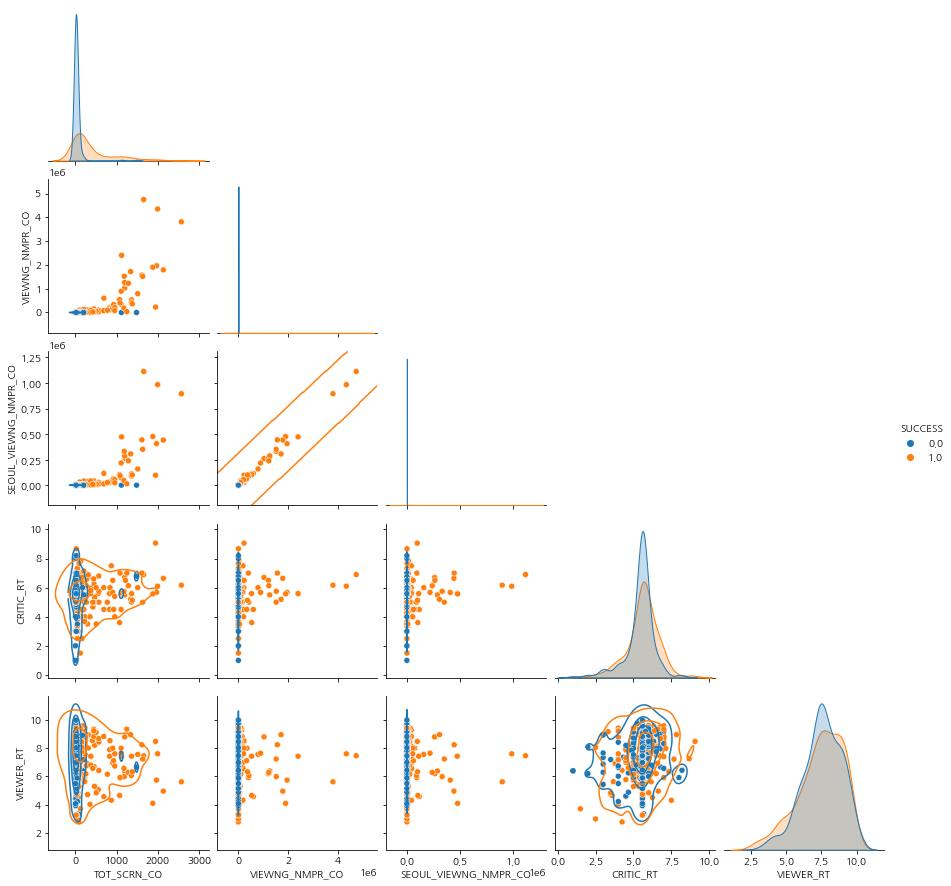

In [24]:
p = sns.pairplot(k_movie, hue = "SUCCESS", corner = True)
p.map_lower(sns.kdeplot, levels=4, color=".2")

- categorical variable 분석

<AxesSubplot:xlabel='MONTH', ylabel='Count'>

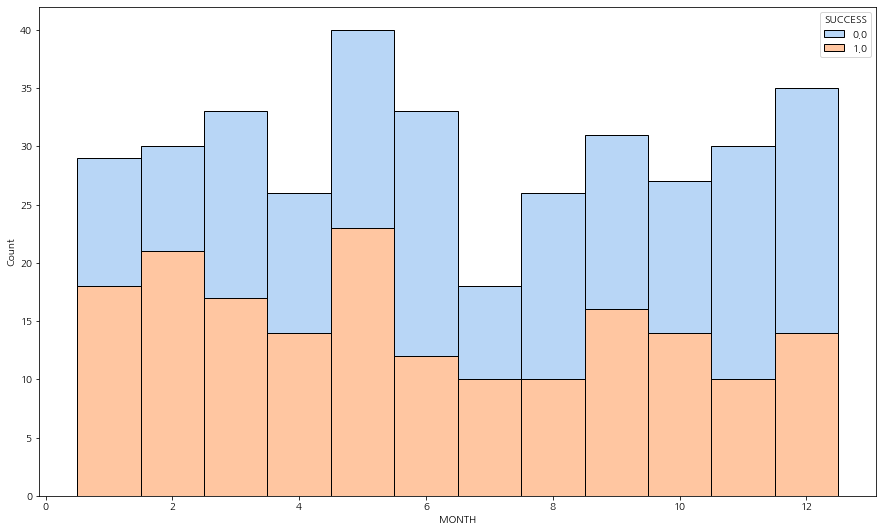

In [59]:
dims = (15, 9) #월별 영화 수
fig, ax = plt.subplots(figsize = dims)
sns.histplot(x = 'MONTH', hue = 'SUCCESS', data = k_movie, multiple="stack", palette="pastel")

<AxesSubplot:xlabel='MONTH', ylabel='VIEWER_RT'>

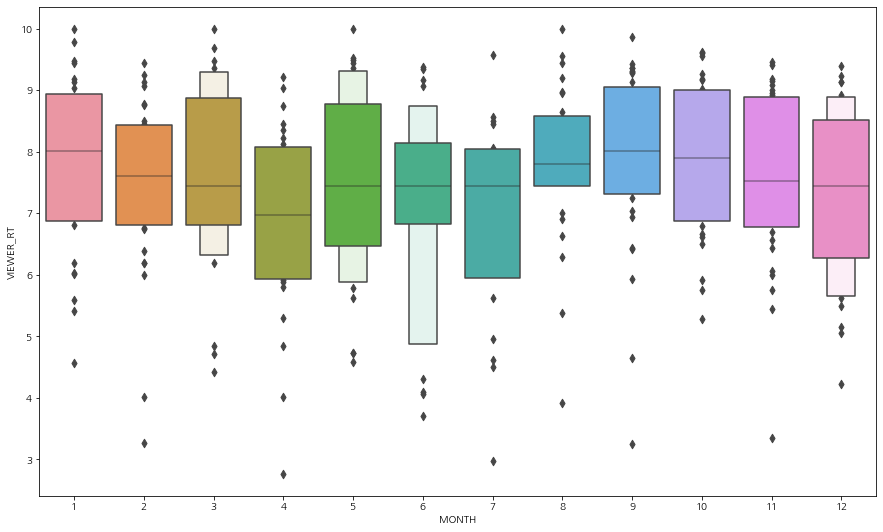

In [86]:
fig, ax = plt.subplots(figsize=dims)
sns.boxenplot(data=k_movie, x = "MONTH", y = "VIEWER_RT")

<AxesSubplot:xlabel='YEAR', ylabel='TOT_SCRN_CO'>

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


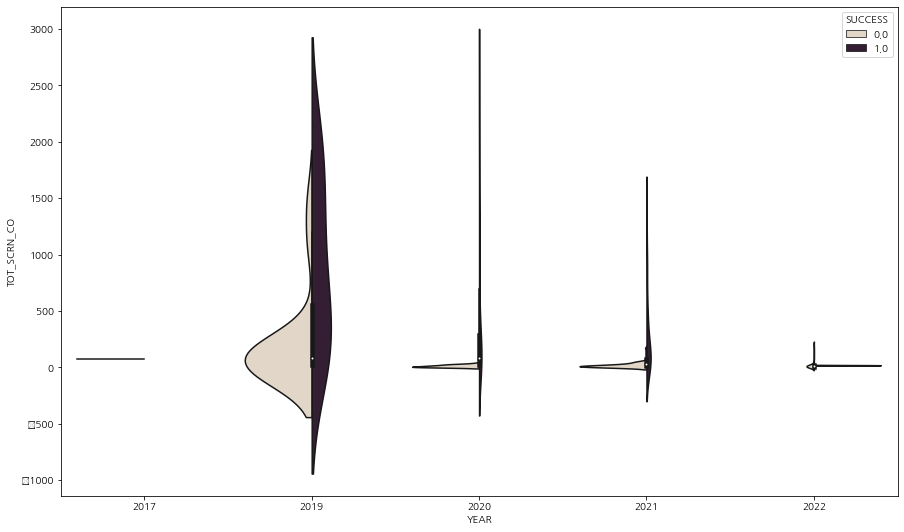

In [56]:
fig, ax = plt.subplots(figsize = dims) #2019년 이후 총 스크린 수가 현저히 줄어듬
sns.violinplot(x="YEAR", y="TOT_SCRN_CO", data = k_movie, hue = "SUCCESS", split=True, palette="ch:.25")

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


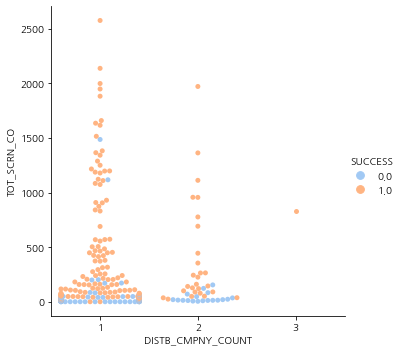

In [58]:
sns.catplot(data = k_movie, x = "DISTB_CMPNY_COUNT", y = "TOT_SCRN_CO", hue = "SUCCESS", kind = "swarm", palette="pastel") #유통회사 수와 총 스크린 수

<AxesSubplot:xlabel='MOVIE_SDIV_NM', ylabel='VIEWER_RT'>

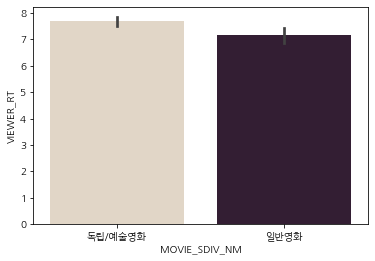

In [62]:
sns.barplot(data = k_movie, x = "MOVIE_SDIV_NM", y = "VIEWER_RT", palette = "ch:.25") #영화 구분에 관계없이 평점은 비슷함

<AxesSubplot:xlabel='GRAD_NM', ylabel='count'>

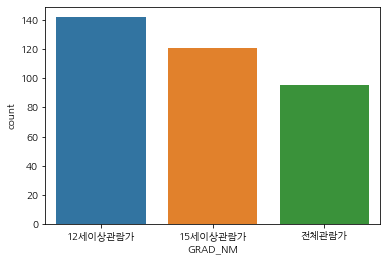

In [63]:
sns.countplot(data = k_movie, x = "GRAD_NM")

<AxesSubplot:xlabel='GRAD_NM', ylabel='VIEWER_RT'>

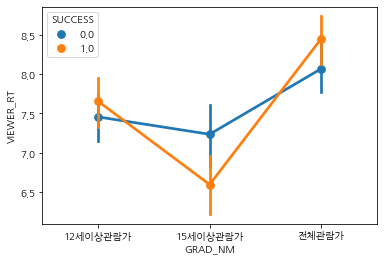

In [65]:
sns.pointplot(data = k_movie, x = "GRAD_NM", y = "VIEWER_RT", hue = "SUCCESS")
#15세 이상 관람가에서 관람객이 많은 영화의 평점이 상대적으로 낮음

<AxesSubplot:xlabel='MOVIE_STLE_NM', ylabel='count'>

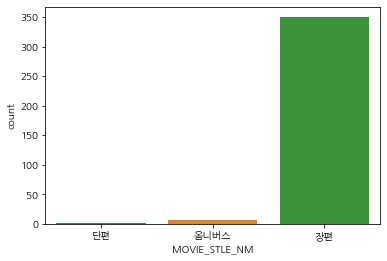

In [67]:
sns.countplot(data = k_movie, x = "MOVIE_STLE_NM") #고른 분포를 보이지 않음

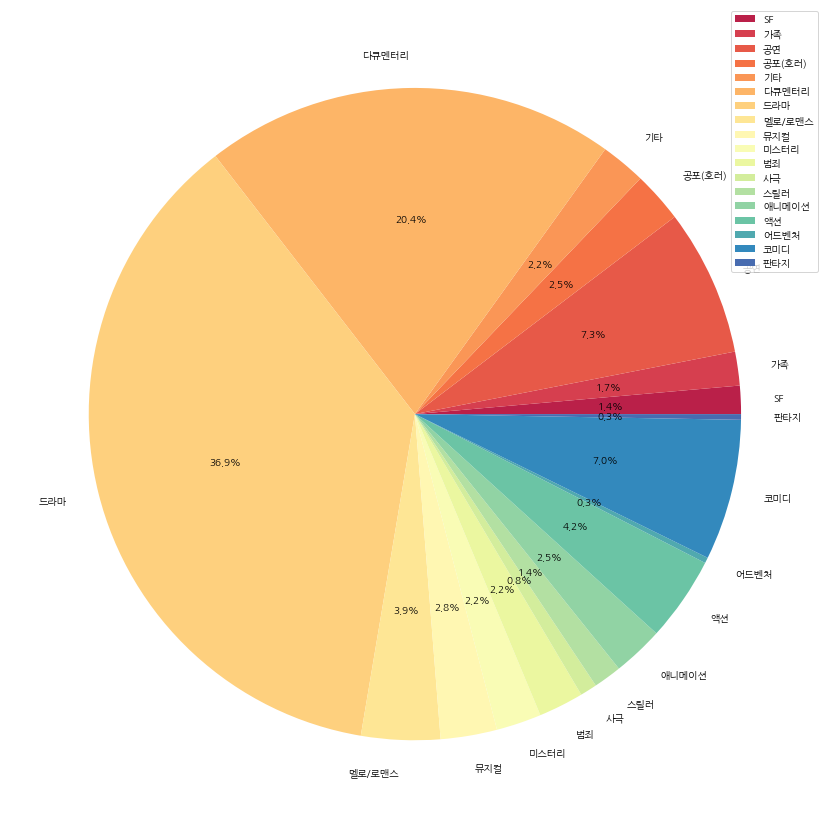

In [82]:
#장르 비율
k_genre = k_movie['GENRE_NM'].value_counts().sort_index()
color = sns.color_palette('Spectral', len(k_genre.index))

fig, ax = plt.subplots(figsize=(18, 15))
plt.pie(k_genre, labels = k_genre.index, autopct='%.1f%%', colors=color)
plt.legend(loc = "upper right")
plt.show()